<a href="https://colab.research.google.com/github/awhitehouse1/project_voting/blob/main/voting_final_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Voting Project

##Eleanor Byrd, Kian Putnam, Ashley Whitehouse

###Summary


The focus of this project was to build a model in order to predict the outcome of the 2024 Presidential election in Virginia. Our methods involved compiling data on each county in Virginia, then running a linear regression in order to predict the number of votes for either the Democrat or Republican party in each county. The data used was historic voting data for each county from the 2016 and 2020 elections, combined with data from the National Historical Geographic Information System (NHGIS). The NHGIS data we used for our model was population numbers for each county in Virginia from 2016-2020, detailing the number of people in that county of a given sex within a certain age range, and also the population of people in that county within a certain income range. The variables we used were male age 18 to 29, male age 30 to 49, male age 50 to 64, male over 65, female age 18 to 29, female age 30 to 49, female age 50 to 64, female over 65, income under 30000, income 30000-49999, income 50000-99999, and income over 100000. Two linear models were built, one based on the 2016 historic election data and one based on the 2020 historic election data. The 2016 model had an $R^2$ on the test set of 0.9137 and Root Mean Squared Error (RMSE) of 3929.4204. The 2020 model had an $R^2$ on the test set of 0.9089 and Root Mean Squared Error (RMSE) of 4022.6981. These models were then bootstrapped, with the 2016 model having an average $R^2$ of 0.9097 and the 2020 model having an average $R^2$ of 0.9194. Thus, overall the NHGIS data did a relatively similar job at predicting the number of Democrat/Republican votes in 2016 and 2020, with the bootstrapped 2020 model performing only slightly better. Thus, the variables outlined above do a relatively good job at predicting Democrat and Republican voting at the county level.

###Data

There were several data sources that were cleaned and used for this project. All cleaning can be found in the cleaning_votes.ipynb file.

First was the historic Voting Data for counties in Virginia (clean_vdf.csv). This data  When cleaning this data, all of the observations for third party votes were dropped, since US politics are dominated by the two-party system. Furthermore, in order to combine this data neatly with the NHGIS data, the county names were cleaned by dropping spaces.

Next, we incorporated the NHGIS County data for 2016 to 2020. This data provides population summary statistics for a variety of topics for every county in the US. For use in this project, we selected only the Virginia counties, and we also selected the age and income data. All numeric variables were converted to integer values, and the county names were made to match the other datasets by dropping the spaces and converting the strings to all uppercase. The age and income variables were cleaned by combining the different age or income subgroups into larger categories for simpler analysis.


####Description of variables used in the final model:

- M_18_to_29 \
  This variable is the number of males between ages 18 and 29 in a given county. It is the sum of original variables 'AMPKE007', 'AMPKE008','AMPKE009', 'AMPKE010', and 'AMPKE011'.

- M_30_to_49 \
  This variable is the number of males between ages 30 and 49 in a given county. It is the sum of original variables 'AMPKE012', 'AMPKE013','AMPKE014', and 'AMPKE015'.

- M_50_to_64 \
  This variable is the number of males between ages 50 and 64 in a given county. It is the sum of original variables 'AMPKE016', 'AMPKE017', 'AMPKE018', and 'AMPKE019'.

- M_65_plus \
  This variable is the number of males age 65 and over in a given county. It is the sum of original variables 'AMPKE020', 'AMPKE021', 'AMPKE022', 'AMPKE023', and 'AMPKE024'.

- F_18_to_29 \
  This variable is the number of females between ages 18 and 29 in a given county. It is the sum of original variables 'AMPKE031', 'AMPKE032', 'AMPKE033', 'AMPKE034', and 'AMPKE035'.

- F_30_to_49 \
  This variable is the number of females betweeen ages 30 and 39 in a given county. It is the sum of original variables 'AMPKE036', 'AMPKE037', 'AMPKE038', and 'AMPKE039'.

- F_50_to_64 \
  This variable is the number of females between ages 50 and 64 in a given county. It is the sum of original variables 'AMPKE040', 'AMPKE041', 'AMPKE042', and 'AMPKE043'.
  
- F_65_plus \
  This variable is the number of females over age 65 in a given county. It is the sum of original variables 'AMPKE044', 'AMPKE045', 'AMPKE046', 'AMPKE047', 'AMPKE048', and 'AMPKE049'.

- income_under_30000 \
  This variable is the number of people with income under $30,000 in a given county. It is the sum of original variables 'AMR7E002', 'AMR7E003', 'AMR7E004', 'AMR7E005', and 'AMR7E006'.

- income_30000_to_49999 \
  This variable is the number of people with income between $30,000 and $49,999 in a given county. It is the sum of original variables 'AMR7E007', 'AMR7E008', 'AMR7E009', and 'AMR7E009'.

- income_50000_to_99999 \
  This variable is the number of people with income between $50,000 and $99,999 in a given county. It is the sum of original variables 'AMR7E011', 'AMR7E012', and 'AMR7E013'.

- income_100000_plus \
  This variable is the number of people with income over $100,000 in a given county. It is the sum of original variables 'AMR7E014', 'AMR7E015', 'AMR7E016', and 'AMR7E017'.



###Results

For this project, after the data was combined we had county age, sex, and income data combined with county voting data for 2016 and 2020, because these elections are probably most similar to the upcoming 2024 election. The following visualizations show the distribution of Democratic and Republican votes for the 2020 Presidential Election in Virginia.

Democratic Votes 2020:
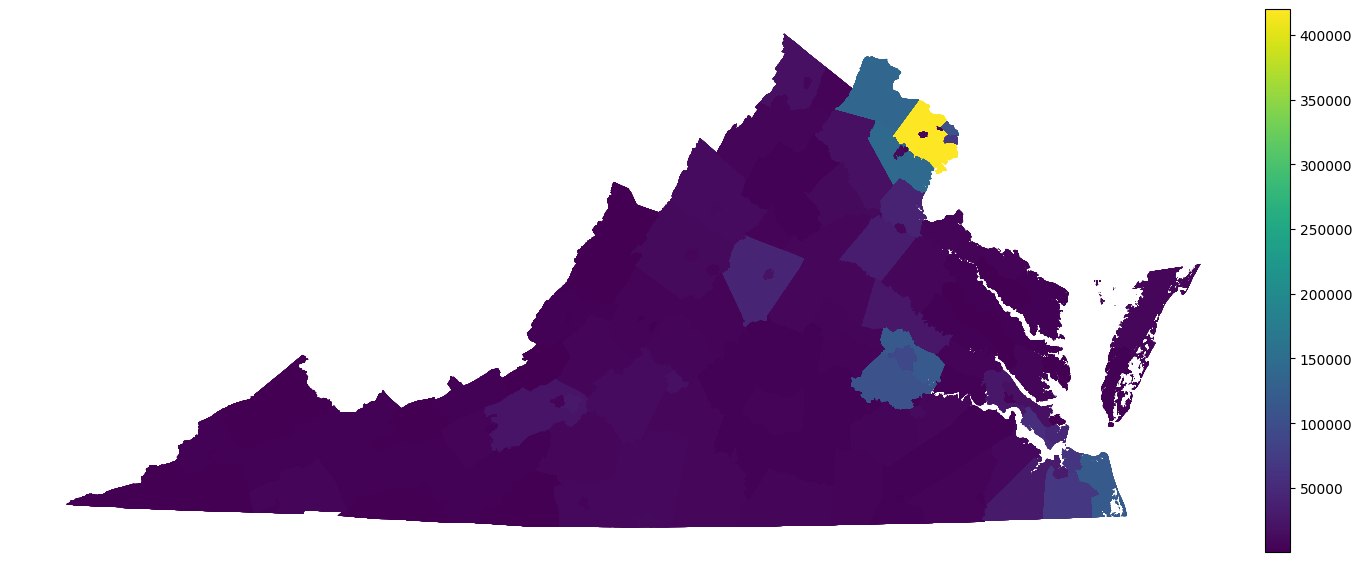

Republican Votes 2020:
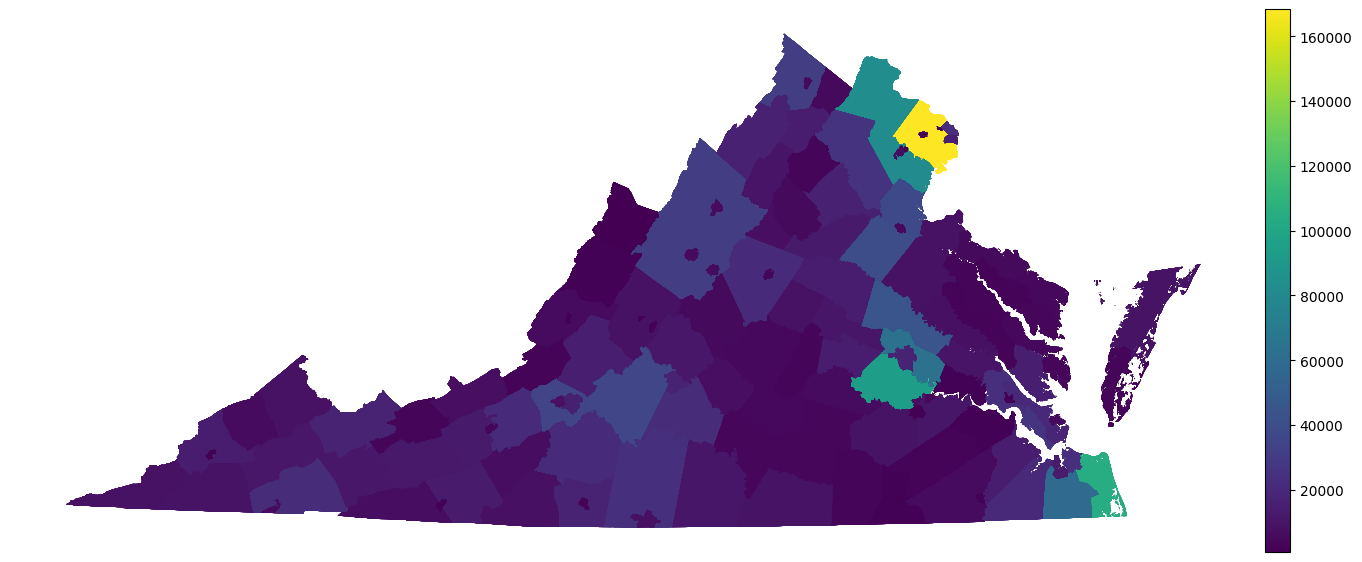

These might look similar at first glance, but they can tell us some important things. First the color gradient in general can tell us the difference in population between the different Virginia counties. There is much higher population in the counties associated with cities, like Washington DC, Richmond, and Virginia Beach. Based on the different scaling in the legend to the right, these graphs also illustrate the urban/rural divide that is common within US politics, with urban areas voting more Democratic and rural areas voting more Republican. It is possible that the age and income variables also align with this, with the cities and surrounding areas having a higher population of young people and people with higher income. Thus we thought that the age and income variables would be important to include in our model.

In [1]:
! git clone https://www.github.com/awhitehouse1/project_voting/

Cloning into 'project_voting'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 124 (delta 9), reused 7 (delta 4), pack-reused 105
Receiving objects: 100% (124/124), 33.63 MiB | 10.09 MiB/s, done.
Resolving deltas: 100% (50/50), done.
Updating files: 100% (49/49), done.


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

vdf = pd.read_csv('./project_voting/clean_data/clean_vdf.csv')
nhgis = pd.read_csv('./project_voting/clean_data/clean_NHGIS_county_data.csv')
virginia_data = nhgis[nhgis['state'] == 'Virginia']
virginia_data['county'] = virginia_data['county'].str.replace('COUNTY', '')  # Remove 'COUNTY' from county names

<ipython-input-73-3af25a4ba59a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  virginia_data['county'] = virginia_data['county'].str.replace('COUNTY', '')  # Remove 'COUNTY' from county names


In [74]:
# merge virginia data with previous election data
vdf_previous_election = vdf.loc[vdf['year']==2020,:]
Rvotes = vdf_previous_election.loc[(vdf_previous_election['party']=='REPUBLICAN'),:].groupby('county_name')['candidatevotes'].sum()
Rvotes = Rvotes.rename('repub_2020')
Dvotes = vdf_previous_election.loc[(vdf_previous_election['party']=='DEMOCRAT'),:].groupby('county_name')['candidatevotes'].sum()
Dvotes = Dvotes.rename('dem_2020')

virginia_data = virginia_data.merge(Dvotes,left_on='county',right_on='county_name')
virginia_data = virginia_data.merge(Rvotes,left_on='county',right_on='county_name')

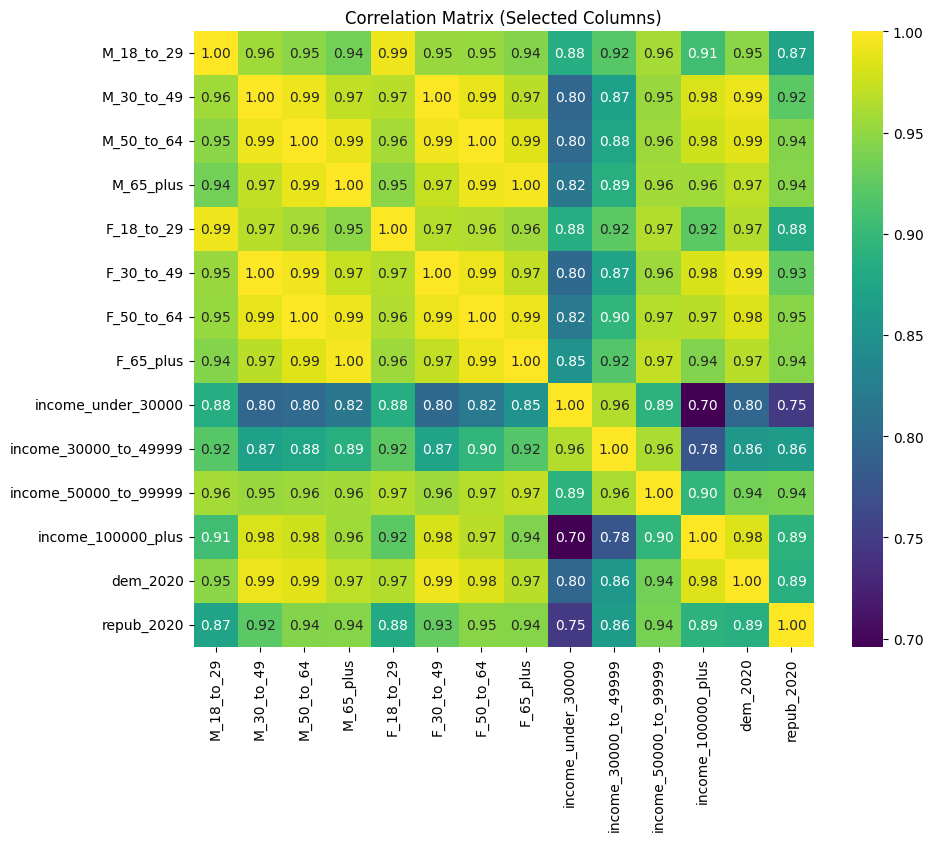

In [75]:
# Select only the specified columns
selected_corr_columns = ['M_18_to_29', 'M_30_to_49', 'M_50_to_64',
       'M_65_plus', 'F_18_to_29', 'F_30_to_49', 'F_50_to_64', 'F_65_plus',
       'income_under_30000', 'income_30000_to_49999', 'income_50000_to_99999',
       'income_100000_plus','dem_2020', 'repub_2020']
selected = virginia_data[selected_corr_columns]

# Calculate correlation matrix
correlation_matrix_selected = selected.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap="viridis",fmt=".2f")
plt.title('Correlation Matrix (Selected Columns)')
plt.show()

From the correlation matrix, we can see that our thoughts about these variables are correct, most of these age and income variables are highly correlated with the Democratic and Republican vote variables, in this case specifically from the 2020 Presidential elections.

A linear regression model using all of the variables, without interaction, was run separately for the 2016 election data and the 2020 election data. They were both run on an 80/20 random test train split. On the training data, the 2016 model had a RMSE of 3274.96 and an $R^2$ of 0.9843. On the test data, the 2016 model had a RMSE 3929.42 and an $R^2$ of 0.9137, so the model performance did decrease on new data. The 2016 model had a Mean Absolute Error of 2587.78 on the test data.
As for the 2020 model, on the training data it had a RMSE of 3461.74 and an $R^2$ of 0.9839. On the test data, it had a RMSE of 4022.70 and an $R^2$ of 0.9089. The 2020 model had a Mean Absolute Error of 2602.09.

Plots of the distributions of the residuals for each model can be found below.
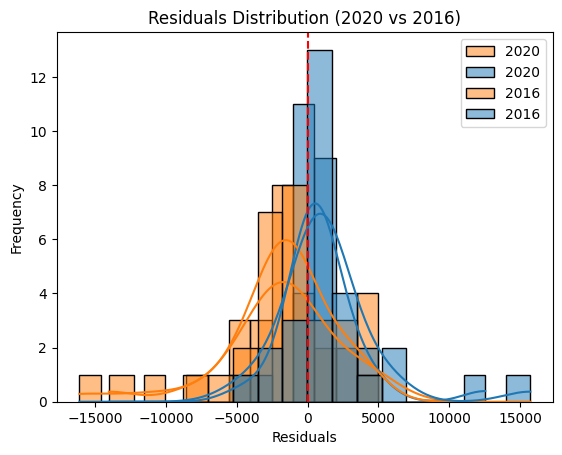

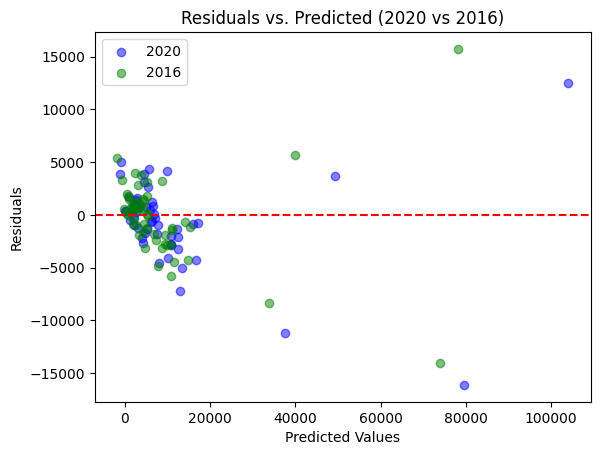


These models were then bootstrapped to determine how precise they are. Both the 2016 and 2020 models were bootstrapped with 100 iterations. The 2016 model had an average $R^2$ of 0.9097 with standard deviation of 0.11, and the 2020 model had an average $R^2$ of 0.9194 with standard deviation of 0.09. Thus overall, the 2020 model was slightly more accurate in its predictions, and its predictions were less varied. This is beneficial for modeling the upcoming 2024 election, since the candidates are likely to be the same as in the 2020 election.

These models predicted vote counts for both the Democratic and Republican parties, so when applying them for use in predicting actual election outcomes, we need to consider both the total outcome across the state of Virginia. We also need to consider the difference between the Republican and Democratic votes, in order to see which party achieves the majority. In our prediction model, we subtracted Democratic votes minus the Republican votes. Thus a positive value would mean a Democratic majority, and a negative value would mean a Republican majority. On the county level, when making predictions using the 2016 model, the Democratic candidate is predicted to have the majority in 5 counties, and the Republican candidate would have the majority in 4 counties. When using the  2020 model, the Democratic candidate is predicted to get more votes in 7 counties and the Republican candidate is predicted to win in 2. As for the total popular vote in Virginia, when using the 2016 model, the Democratic candidate is predicted to win by 182,096 votes, and when using the 2020 model, the Democratic candidate is predicted to win by 455,261 votes. This is a relatively significant difference in the win margin between the models, and thus the prediction variance is important to consider.

Interestingly, in the actual 2016 election in Virginia, Hilary Clinton (Democrat) beat Donald Trump (Republican) by 212,030 votes, and in 2020 Joe Biden (Democrat) beat Donald Trump (Republican) by 451,138 votes, which are similar margins to the predicted values. These numbers were taken from the Virginia Department of Elections website, at https://historical.elections.virginia.gov/elections/view/80871/ and https://historical.elections.virginia.gov/elections/view/144567/ .

###Conclusion

In conclusion, based on the $R^2$ and error metrics, the county-level age, sex, and income data is relatively successful at predicting voting outcomes for Presidential elections in Virginia. Our $R^2$'s where about 0.90, which means that about 90% of the variance in how many people vote for either the Republican or Democrat candidate in a certain county is explained by the variables that we included in the model. That being said, there are things that could have been done to make this model better. First, the linear model predicted the Democratic vote number and Republican vote number separately. This means that when the predicted numbers of Democratic and Republican votes are combined, it's possible for the model to either overestimate or underestimate the population of each county. Since the electoral college votes in Virginia are simply determined by a popular majority, this could affect the outcome of the model. As seen above, the actual win margin in 2016 was only 212,030 votes, so a few over- or underestimated counties could skew the overall prediction. This could be corrected by finding the difference in Democratic and Republican votes for each county, and running the model to predict this number. Furthermore, the bootstrapping was done with replacement on data that contained one observation for each county in Virginia. Thus it is possible that each model in the bootstrap iteration does not accurately represent all of the counties in Virginia.

Additionally, this model could be improved by including more historic voting data to see if insights could be drawn from how Virginia politics have changed over time beyond just 2016 and 2020. Furthermore, the original NHGIS data had a lot of variables. We found that sex, age, and income where very predictive, but based on the correlation matrix, a lot of them are highly correlated with each other. Thus, to avoid multicolinearity, other techniques like LASSO could be used to determine the most predictive variables to include in the linear model. Also, finding data on updated county metrics for 2024 or more recent years and then applying the model to that data to make predictions would probably provide more accurate outcomes.

###Appendix

The following data was cleaned but not included in the final model.

First, the County Adjacencies Data (clean_cdf.csv) outlines all neighbors, districts, FIPS county identifiers, and populations in 2022 for all counties and cities in Virginia. Here, the only cleaning done was that the county names were capitalized in order to match with the county names to voting dataset.

Second, the data was found on Presidential election by county throughout the entire United States (county_presidential_returns_2000-2020.csv). This dataset could be useful for looking at other counties in the United States and comparing their composition and voting patterns to the counties in Virginia. This data was similarly cleaned by dropping third parties and dropping spaces from the county names.


Alternate Residual Plot:

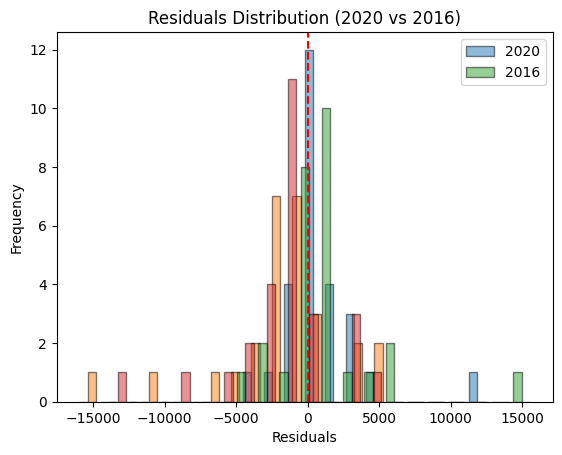